In [1]:
import gc
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
# import seaborn as sns
# from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import futuresalesutility as fu

In [2]:
m1 = pd.read_csv('valid_my_stuff.csv.gz')
m2 = pd.read_csv('valid_extra_features.csv.gz')
items = pd.read_csv("../input/competitive-data-science-predict-future-sales/items.csv")
m1 = m1.merge(items[['item_id', 'item_name']], on='item_id', how='left')
m2 = m2.merge(items[['item_id', 'item_name']], on='item_id', how='left')

In [58]:
train = pd.read_csv("../input/competitive-data-science-predict-future-sales/sales_train.csv")
train["date"] = pd.to_datetime(train["date"], format="%d.%m.%Y")

In [54]:
m1['err'] = np.abs(m1.item_cnt_month - m1.preds.clip(0,20))
m2['err'] = np.abs(m2.item_cnt_month - m2.preds.clip(0,20))
m1['errdiff'] = m1['err'] - m2['err']

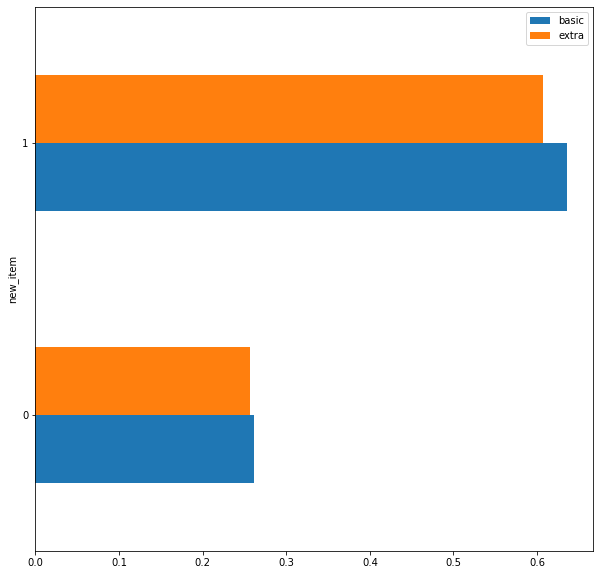

In [47]:
grouper = ['new_item']
basic = pd.DataFrame(m1.groupby(grouper).err.mean().rename('basic'))
extra = m2.groupby(grouper).err.mean().rename('extra')

basic = basic.merge(extra, left_index=True, right_index=True)
basic = basic.sort_values('basic', ascending=True)
ax = basic.plot.barh(figsize=(10,10))
# _ = plt.title('General categories in train and test sets')
# _ = plt.xlabel('proportion')

In [61]:
m1[['item_id', 'item_name_group', 'item_name', 'item_category_id', 'item_cnt_month', 'preds', 'err', 'errdiff']].nsmallest(50, 'errdiff')

,item_id,item_name_group,item_name,item_category_id,item_cnt_month,preds,err,errdiff
137449,1586,695,"Assassin's Creed: Синдикат. Чаринг-Кросс [PS4,...",20,2,7.057077,5.057077,-3.065086
137456,1581,695,"Assassin's Creed: Синдикат. Грачи [PS4, русска...",20,2,7.057077,5.057077,-3.065086
137457,1583,695,Assassin's Creed: Синдикат. Специальное издани...,20,3,7.057077,4.057077,-3.065086
137569,1578,695,"Assassin's Creed: Синдикат. Биг Бен [PS4, русс...",20,6,7.057077,1.057077,-3.065086
63543,1586,695,"Assassin's Creed: Синдикат. Чаринг-Кросс [PS4,...",20,4,6.437537,2.437537,-2.844660
63550,1581,695,"Assassin's Creed: Синдикат. Грачи [PS4, русска...",20,4,6.437537,2.437537,-2.844660
63663,1578,695,"Assassin's Creed: Синдикат. Биг Бен [PS4, русс...",20,4,6.437537,2.437537,-2.844660
200804,1581,695,"Assassin's Creed: Синдикат. Грачи [PS4, русска...",20,3,6.335368,3.335368,-2.798055
211223,15067,6571,Меч и Магия. Герои VII. Коллекционное издание ...,29,1,7.686184,6.686184,-2.628840
26727,3353,1377,"FIFA 16 [Xbox One, русская версия]",24,16,11.292945,4.707055,-2.535518


In [52]:
m2[['item_id', 'item_name', 'item_category_id', 'item_cnt_month', 'preds', 'err']].nlargest(30, 'err')

,item_id,item_name,item_category_id,item_cnt_month,preds,err
22123,17270,ПОСЛЕДНИЙ РУБЕЖ (BD),37,20,0.026243,19.973757
22240,21811,ШАКАЛ (BD),37,20,0.031512,19.968488
22718,11055,ДИВЕРГЕНТ (BD),37,20,0.046122,19.953878
22141,16629,ОСТАВЛЕННЫЕ (BD),37,20,0.056990,19.943010
26733,2431,"Crew. Специальное издание [Xbox One, русская в...",24,20,0.322434,19.677566
28776,20386,Фигурка Assassin's Creed IV Black Flag Edward ...,72,20,0.747806,19.252194
83238,2404,"Company of Heroes: Opposing Fronts [PC, Цифров...",31,20,0.983747,19.016253
26507,13241,Комикс Ведьмак Лисьи дети,47,20,1.025715,18.974285
37067,13247,Комикс Дэдпул уничтожает литературу,47,20,1.403758,18.596242
26509,13247,Комикс Дэдпул уничтожает литературу,47,20,1.472223,18.527777


In [ ]:
import shap
temp = X_test.drop(columns='lgb_pred').sample(10000)
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(temp)
shap.summary_plot(shap_values, temp, max_display=30)